In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3

import milopy.core as milo
import milopy.plot as milopl

In [3]:
input_file = "/lustre/scratch126/cellgen/team205/rl20/T_cell_lym/object/TCL_final_integ_LN_scVI_without_tu_stroma_laryer10_celltypist_panImm_low.h5ad"
adata = sc.read_h5ad(input_file)

In [4]:
adata.obs['batch'].value_counts()

1    92820
0    84351
Name: batch, dtype: int64

In [5]:
adata.obs['Condition'] = "Healthy_LN"
ll = adata.obs['batch'] == '1'
adata.obs.loc[ll, 'Condition'] = 'Lymphoma_LN'

In [6]:
adata.obs['Condition']

ACACTGACACACCGAC_Human_colon_16S8000484-0     Healthy_LN
GTCGTAATCCGCGGTA_Human_colon_16S8000484-0     Healthy_LN
ACGGAGAAGAAGGGTA_Human_colon_16S8000484-0     Healthy_LN
CTGTTTATCACATAGC_Human_colon_16S8000484-0     Healthy_LN
GCTTCCATCCCTAACC_Human_colon_16S8000484-0     Healthy_LN
                                                ...     
TTGTAGGCATCCCATC-1-TL_SJH03_GEX_CITE-1       Lymphoma_LN
TTGTAGGGTGTCTGAT-1-TL_SJH03_GEX_CITE-1       Lymphoma_LN
TTTGCGCTCTGCGTAA-1-TL_SJH03_GEX_CITE-1       Lymphoma_LN
TTTGCGCTCTGTCAAG-1-TL_SJH03_GEX_CITE-1       Lymphoma_LN
TTTGGTTCACGCGAAA-1-TL_SJH03_GEX_CITE-1       Lymphoma_LN
Name: Condition, Length: 177171, dtype: object

In [7]:
#adata.obs = adata.obs[['donor','age','batch','study',
#                       'ann_vas_3_copy','broad_cell_type_new',
#                       'predicted_labels','majority_voting','conf_score', 'Condition']]

In [8]:
adata

AnnData object with n_obs × n_vars = 177171 × 25610
    obs: 'id', 'organ', 'donor', 'kit', 'sorting', 'location', 'age', 'gender', 'dissociation', 'scrublet_score', 'doublet_bh_pval', 'published_annotation', 'HCA', 'published_annotation_skin', 'batch', 'study', 'cell_ontology_class', 'free_annotation', 'compartment', 'age2', 'barcode', 'concat_sample_no', 'Population ', 'hospital_id', 'Organ', 'Cell_category', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Majority_voting_CellTypist_high', 'doublet_pval', 'Project', 'broad_celltype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'int_or_ext', 'original_index', 'ann_vas_2', 'index_uni', 'leiden_scVI', 'ann_vas_1', 'ann_vas_3', 'ann_vas_3_copy', 'ann_vas_2_copy', 'organ_uni', 'ann_compartment', 'ID', 'sample_id', 'donor_id', 'tumour_type', 'site', 'type', 'ds', 'mad_MED', 'mad_MAD', 'mad_thr', 'broad_cell_type_new', 'n_genes', 'percent_mito', 'n_counts', 'stud

In [9]:
## Recompute KNN graph
sc.pp.neighbors(adata, use_rep = "X_scVI", n_neighbors = 100, key_added="scvi")

## Construct neighbourhoods
milo.make_nhoods(adata, neighbors_key="scvi", prop=0.05)


computing neighbors


/home/jovyan/my-conda-envs/myenv_old/lib/python3.7/site-packages/numba/core/typed_passes.py:327: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../my-conda-envs/myenv_old/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/home/jovyan/my-conda-envs/myenv_old/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../my-c

    finished: added to `.uns['scvi']`
    `.obsp['scvi_distances']`, distances for each pair of neighbors
    `.obsp['scvi_connectivities']`, weighted adjacency matrix (0:02:05)


In [11]:
adata[adata.obs['nhood_ixs_refined'] != 0].obs[['nhood_ixs_refined', 'nhood_kth_distance']]

,nhood_ixs_refined,nhood_kth_distance
TCTATTGCATGGTAGG_Human_colon_16S8000484-0,1,3.024392
GCTCCTAAGACGCAAC_Human_colon_16S8000484-0,1,0.816959
CCGGGATTCAGAGGTG_Human_colon_16S8000484-0,1,0.937070
GTAACGTAGCACACAG_Human_colon_16S8000484-0,1,0.855208
CGTCACTTCTAAGCCA_Human_colon_16S8000484-0,1,0.999768
...,...,...
AGGGTGAAGAGCTGCA-1-TL_SJH03_GEX_CITE-1,1,1.207570
ATCCACCAGAGGACGG-1-TL_SJH03_GEX_CITE-1,1,1.109535
CAGCTGGAGTGTCCAT-1-TL_SJH03_GEX_CITE-1,1,0.811504
CCCATACTCTGTCCGT-1-TL_SJH03_GEX_CITE-1,1,1.722151


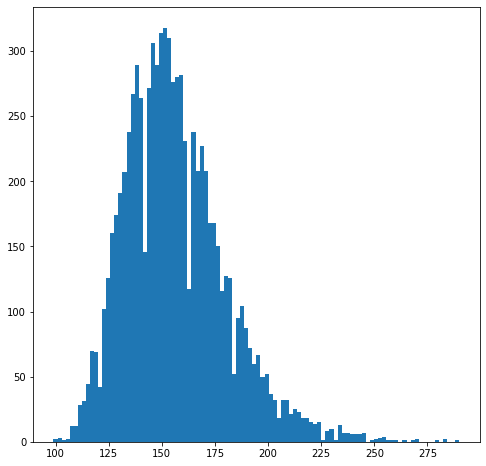

In [12]:
nhood_size = np.array(adata.obsm["nhoods"].sum(0)).ravel()
plt.hist(nhood_size, bins=100);

In [13]:
milo.count_nhoods(adata, sample_col="donor")


/home/jovyan/my-conda-envs/myenv_old/lib/python3.7/site-packages/milopy/core.py:157: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  nhood_adata = anndata.AnnData(X=nhood_count_mat, var=nhood_var)
/home/jovyan/my-conda-envs/myenv_old/lib/python3.7/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [14]:
adata.uns["nhood_adata"]


AnnData object with n_obs × n_vars = 8243 × 26
    obs: 'index_cell', 'kth_distance'
    uns: 'sample_col'

In [15]:
milo.DA_nhoods(adata, design="~Condition")


/home/jovyan/my-conda-envs/myenv_old/lib/python3.7/site-packages/rpy2/robjects/vectors.py:980: UserWarning: R object inheriting from "POSIXct" but without attribute "tzone".
  warnings.warn('R object inheriting from "POSIXct" but without '
/home/jovyan/my-conda-envs/myenv_old/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:2085: PytzUsageWarning: The zone attribute is specific to pytz's interface; please migrate to a new time zone provider. For more details on how to do so, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  values, tz_parsed = conversion.datetime_to_datetime64(data)


In [16]:
adata.uns["nhood_adata"].obs


,index_cell,kth_distance,logFC,logCPM,F,PValue,FDR,SpatialFDR
0,TCTATTGCATGGTAGG_Human_colon_16S8000484-0,3.024392,2.535312,8.541108,3.975258,0.046175,0.105286,0.106526
1,GCTCCTAAGACGCAAC_Human_colon_16S8000484-0,0.816959,-1.473994,8.221786,2.553010,0.110086,0.201787,0.204697
2,CCGGGATTCAGAGGTG_Human_colon_16S8000484-0,0.937070,-0.105730,8.195332,0.012350,0.911515,0.942855,0.944543
3,GTAACGTAGCACACAG_Human_colon_16S8000484-0,0.855208,-0.664889,7.938201,0.564740,0.452357,0.573306,0.577876
4,CGTCACTTCTAAGCCA_Human_colon_16S8000484-0,0.999768,0.138167,8.449951,0.017006,0.896243,0.932452,0.934189
...,...,...,...,...,...,...,...,...
8238,AGGGTGAAGAGCTGCA-1-TL_SJH03_GEX_CITE-1,1.207570,2.025075,8.757130,2.080760,0.149167,0.253471,0.256836
8239,ATCCACCAGAGGACGG-1-TL_SJH03_GEX_CITE-1,1.109535,1.500509,8.501104,1.648077,0.199222,0.314181,0.317751
8240,CAGCTGGAGTGTCCAT-1-TL_SJH03_GEX_CITE-1,0.811504,1.001921,8.905212,0.512044,0.474256,0.594208,0.598818
8241,CCCATACTCTGTCCGT-1-TL_SJH03_GEX_CITE-1,1.722151,3.315808,9.172271,3.835824,0.050170,0.111559,0.112882


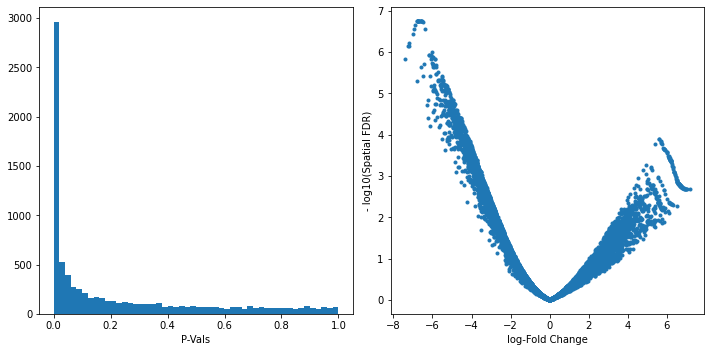

In [17]:
old_figsize = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = [10,5]
plt.subplot(1,2,1)
plt.hist(adata.uns["nhood_adata"].obs.PValue, bins=50);
plt.xlabel("P-Vals");
plt.subplot(1,2,2)
plt.plot(adata.uns["nhood_adata"].obs.logFC, -np.log10(adata.uns["nhood_adata"].obs.SpatialFDR), '.');
plt.xlabel("log-Fold Change");
plt.ylabel("- log10(Spatial FDR)");
plt.tight_layout()
plt.rcParams["figure.figsize"] = old_figsize


In [18]:
import milopy.utils
milopy.utils.build_nhood_graph(adata)


In [66]:
adata


AnnData object with n_obs × n_vars = 177171 × 25610
    obs: 'id', 'organ', 'donor', 'kit', 'sorting', 'location', 'age', 'gender', 'dissociation', 'scrublet_score', 'doublet_bh_pval', 'published_annotation', 'HCA', 'published_annotation_skin', 'batch', 'study', 'cell_ontology_class', 'free_annotation', 'compartment', 'age2', 'barcode', 'concat_sample_no', 'Population ', 'hospital_id', 'Organ', 'Cell_category', 'Predicted_labels_CellTypist', 'Majority_voting_CellTypist', 'Majority_voting_CellTypist_high', 'doublet_pval', 'Project', 'broad_celltype', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'int_or_ext', 'original_index', 'ann_vas_2', 'index_uni', 'leiden_scVI', 'ann_vas_1', 'ann_vas_3', 'ann_vas_3_copy', 'ann_vas_2_copy', 'organ_uni', 'ann_compartment', 'ID', 'sample_id', 'donor_id', 'tumour_type', 'site', 'type', 'ds', 'mad_MED', 'mad_MAD', 'mad_thr', 'broad_cell_type_new', 'n_genes', 'percent_mito', 'n_counts', 'stud

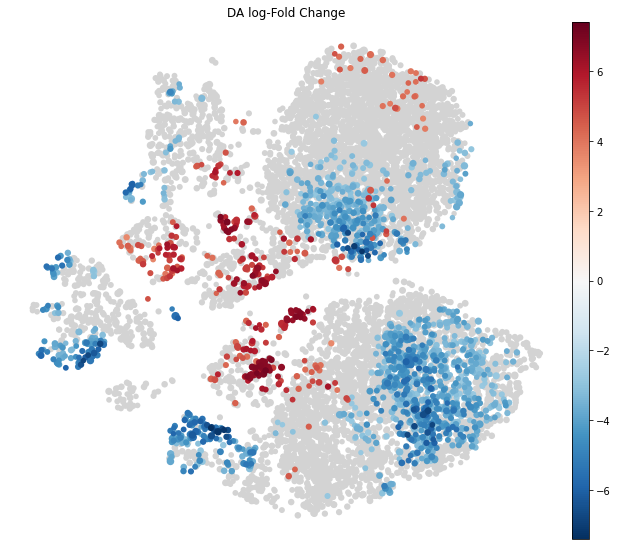

In [81]:
plt.rcParams["figure.figsize"] = [11,9.5]
milopl.plot_nhood_graph(adata, 
                        alpha=0.01, ## SpatialFDR level (1%) 
                        min_size=1, ## Size of smallest dot\
                        plot_edges = False,
                        save='milo_LN_UMAP.pdf')


In [21]:
milopy.utils.annotate_nhoods(adata, anno_col='majority_voting')


Text(0.5, 0, 'celltype fraction')

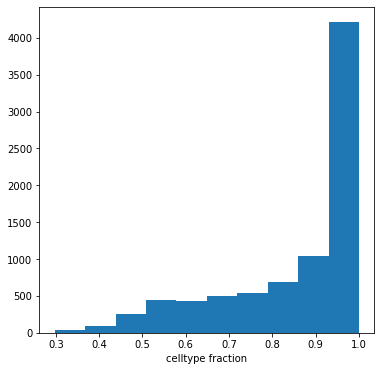

In [22]:
plt.hist(adata.uns['nhood_adata'].obs["nhood_annotation_frac"]);
plt.xlabel("celltype fraction")


In [23]:
adata.uns['nhood_adata'].obs.loc[adata.uns['nhood_adata'].obs["nhood_annotation_frac"] < 0.8, "nhood_annotation"] = "Mixed"


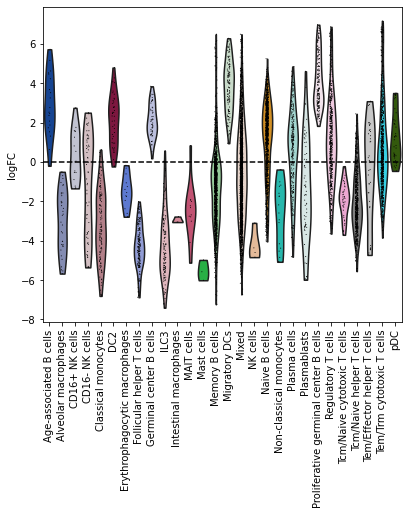

In [24]:
sc.pl.violin(adata.uns['nhood_adata'], "logFC", groupby="nhood_annotation", rotation=90, show=False);
plt.axhline(y=0, color='black', linestyle='--');
plt.show()

In [85]:
adata.uns['nhood_adata']


AnnData object with n_obs × n_vars = 8243 × 26
    obs: 'index_cell', 'kth_distance', 'logFC', 'logCPM', 'F', 'PValue', 'FDR', 'SpatialFDR', 'Nhood_size', 'nhood_annotation', 'nhood_annotation_frac'
    var: 'Condition', 'donor'
    uns: 'sample_col', 'nhood', 'annotation_labels', 'annotation_obs', 'nhood_annotation_colors'
    obsm: 'X_milo_graph', 'frac_annotation'
    obsp: 'nhood_connectivities'

In [25]:
adata.uns["nhood_adata"].obs


,index_cell,kth_distance,logFC,logCPM,F,PValue,FDR,SpatialFDR,Nhood_size,nhood_annotation,nhood_annotation_frac
0,TCTATTGCATGGTAGG_Human_colon_16S8000484-0,3.024392,2.535312,8.541108,3.975258,0.046175,0.105286,0.106526,153.0,Regulatory T cells,0.836601
1,GCTCCTAAGACGCAAC_Human_colon_16S8000484-0,0.816959,-1.473994,8.221786,2.553010,0.110086,0.201787,0.204697,148.0,Memory B cells,1.000000
2,CCGGGATTCAGAGGTG_Human_colon_16S8000484-0,0.937070,-0.105730,8.195332,0.012350,0.911515,0.942855,0.944543,147.0,Memory B cells,0.925170
3,GTAACGTAGCACACAG_Human_colon_16S8000484-0,0.855208,-0.664889,7.938201,0.564740,0.452357,0.573306,0.577876,136.0,Mixed,0.742647
4,CGTCACTTCTAAGCCA_Human_colon_16S8000484-0,0.999768,0.138167,8.449951,0.017006,0.896243,0.932452,0.934189,151.0,Tem/Trm cytotoxic T cells,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
8238,AGGGTGAAGAGCTGCA-1-TL_SJH03_GEX_CITE-1,1.207570,2.025075,8.757130,2.080760,0.149167,0.253471,0.256836,176.0,Tem/Trm cytotoxic T cells,0.965909
8239,ATCCACCAGAGGACGG-1-TL_SJH03_GEX_CITE-1,1.109535,1.500509,8.501104,1.648077,0.199222,0.314181,0.317751,152.0,Tem/Trm cytotoxic T cells,0.828947
8240,CAGCTGGAGTGTCCAT-1-TL_SJH03_GEX_CITE-1,0.811504,1.001921,8.905212,0.512044,0.474256,0.594208,0.598818,222.0,Tem/Trm cytotoxic T cells,1.000000
8241,CCCATACTCTGTCCGT-1-TL_SJH03_GEX_CITE-1,1.722151,3.315808,9.172271,3.835824,0.050170,0.111559,0.112882,134.0,Mixed,0.776119


In [26]:
adata.uns["nhood_adata"].obs.to_csv('nhood_milo.csv')


In [27]:
## r2py setup
import anndata2ri
import rpy2.rinterface_lib.callbacks
import logging
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

anndata2ri.activate()


In [28]:
%load_ext rpy2.ipython


In [29]:
%%R
library(miloR)
library(igraph)
library(SingleCellExperiment)
library(scater)
library(scran)
library(dplyr)
library(patchwork)



In [30]:
%%R 
DA_results <- read.csv('nhood_milo.csv')
DA_results$Nhood <- DA_results$Nhood+1
DA_results %>% head


  Nhood                                index_cell kth_distance      logFC
1     1 TCTATTGCATGGTAGG_Human_colon_16S8000484-0    3.0243919  2.5353118
2     2 GCTCCTAAGACGCAAC_Human_colon_16S8000484-0    0.8169585 -1.4739937
3     3 CCGGGATTCAGAGGTG_Human_colon_16S8000484-0    0.9370703 -0.1057299
4     4 GTAACGTAGCACACAG_Human_colon_16S8000484-0    0.8552075 -0.6648893
5     5 CGTCACTTCTAAGCCA_Human_colon_16S8000484-0    0.9997680  0.1381668
6     6 AATCGGTGTCCGTTAA_Human_colon_16S8000484-0    0.9135550 -5.7040666
    logCPM           F       PValue          FDR   SpatialFDR Nhood_size
1 8.541108  3.97525775 4.617476e-02 1.052865e-01 1.065258e-01        153
2 8.221786  2.55301014 1.100859e-01 2.017875e-01 2.046973e-01        148
3 8.195332  0.01234953 9.115146e-01 9.428554e-01 9.445431e-01        147
4 7.938201  0.56474030 4.523575e-01 5.733061e-01 5.778764e-01        136
5 8.449951  0.01700636 8.962434e-01 9.324516e-01 9.341887e-01        151
6 7.821324 30.75597303 2.929742e-08 4.298553

In [44]:
%%R 
DA_results_filter <- DA_results[DA_results$SpatialFDR < 0.25,]
DA_results_filter %>% head

   Nhood                                index_cell kth_distance     logFC
1      1 TCTATTGCATGGTAGG_Human_colon_16S8000484-0    3.0243919  2.535312
2      2 GCTCCTAAGACGCAAC_Human_colon_16S8000484-0    0.8169585 -1.473994
6      6 AATCGGTGTCCGTTAA_Human_colon_16S8000484-0    0.9135550 -5.704067
8      8 ACTGTCCGTAGGGTAC_Human_colon_16S8000484-0    0.8822632 -2.240277
9      9 CTTCTCTCACCACCAG_Human_colon_16S8000484-0    0.7706537 -2.622838
10    10 GACGGCTGTGCCTGGT_Human_colon_16S8000484-0    0.8158220 -1.758355
     logCPM         F       PValue          FDR   SpatialFDR Nhood_size
1  8.541108  3.975258 4.617476e-02 1.052865e-01 1.065258e-01        153
2  8.221786  2.553010 1.100859e-01 2.017875e-01 2.046973e-01        148
6  7.821324 30.755973 2.929742e-08 4.298553e-06 4.768795e-06        146
8  8.331844  5.369607 2.049161e-02 5.659176e-02 5.724301e-02        170
9  8.020407  9.052156 2.624182e-03 1.206631e-02 1.202440e-02        147
10 8.234894  3.635859 5.654887e-02 1.218965e-01 1.

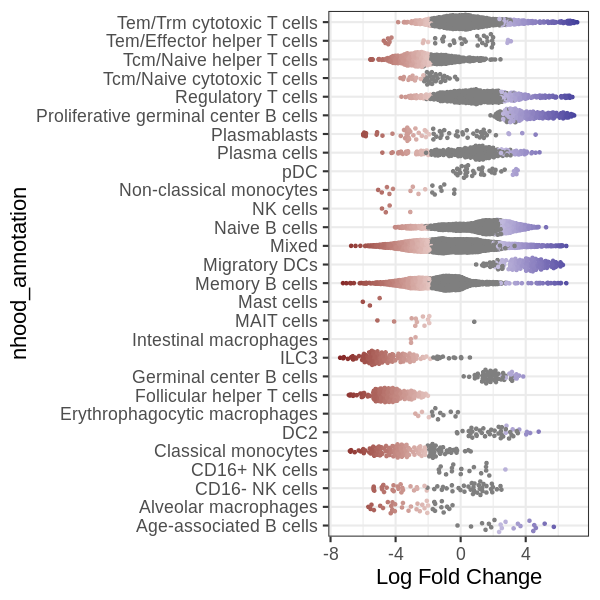

In [32]:
%%R -w 600 -h 600
plotDAbeeswarm(DA_results, group.by = "nhood_annotation")


In [75]:
%%R -w 800 -h 900 
library(ggplot2)

DA_results_filter <- DA_results[DA_results$nhood_annotation != 'Mixed', ]

plotDAbeeswarm(DA_results_filter, group.by = "nhood_annotation") + 
    theme(legend.position = "none") +
    #theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
    geom_hline(yintercept=0, linetype=2, color="black")+
    scale_colour_gradient2(low = scales::muted("blue"), mid = "white",
                           high = scales::muted("red"))

ggsave("./figures/milo_LN.pdf")
### "cell_states" represents pre-defined/pre-annotated cell clusters

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Saving 11.1 x 12.5 in image
